In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [8]:
def barplot(df, labels):
  categories = labels
  sns.set(font_scale = 2)
  plt.figure(figsize=(15,8))
  ax= sns.barplot(categories, df.iloc[:,1:].sum().values)
  plt.title("Reviews in each category", fontsize=24)
  plt.ylabel('Number of reviews', fontsize=18)
  plt.xlabel('Topic ', fontsize=18)
  #adding the text labels
  rects = ax.patches
  plot_labels = df.iloc[:,1:].sum().values
  for rect, label in zip(rects, plot_labels):
      height = rect.get_height()
      ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
  plt.xticks(rotation = 25)
  plt.show()
  sns.set(font_scale = 1)

# *Electric charging stations reviews*

In [11]:
data_dir = '../data'
df = pd.read_csv(os.path.join(data_dir, 'train_final.csv'))
df.drop(columns=['id'], inplace=True)
df.head()

,review,functionality,range_anxiety,availability,cost,ui,location,service_time,dealership
0,Reliable....but under a eucalyptus tree that s...,0,0,0,0,0,1,0,0
1,"Quick charge. It working, but lvl 2 dorks fine.",1,0,0,0,0,0,0,0
2,So the dealer had all of their cars being serv...,0,0,1,0,0,0,0,1
3,No charging stations but 220 & 110 outlets and...,0,0,1,0,0,1,1,0
4,"Was only there @ 9PM Jan 04, 2015. Works flawl...",1,0,0,0,0,0,0,0


## Number of words in each review

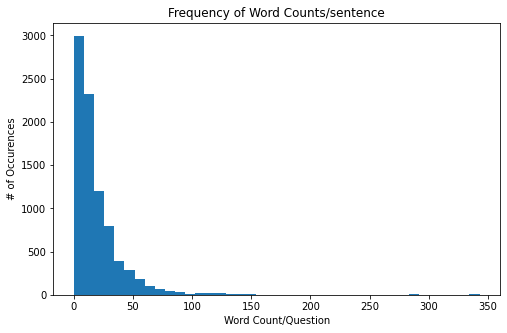

In [12]:
# compute no. of words in each question
review = df.review
word_cnt = [len(quest.split()) for quest in review]
# Plot the distribution
plt.figure(figsize=[8,5])
plt.hist(word_cnt, bins = 40)
plt.xlabel('Word Count/Question')
plt.ylabel('# of Occurences')
plt.title("Frequency of Word Counts/sentence")
plt.show()

## Number of classes per review

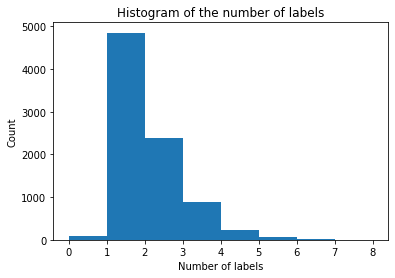

In [15]:
num_labels = []
for review in df.itertuples():
  labels_per_sample = sum(review[2:])
  num_labels.append(labels_per_sample)
plt.xlabel('Number of labels')
plt.title('Histogram of the number of labels')
plt.ylabel('Count')
plt.hist(num_labels, bins=max(num_labels))
plt.show()

/Users/agnieszkamiszkurka/.pyenv/versions/new_ml_stuff/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


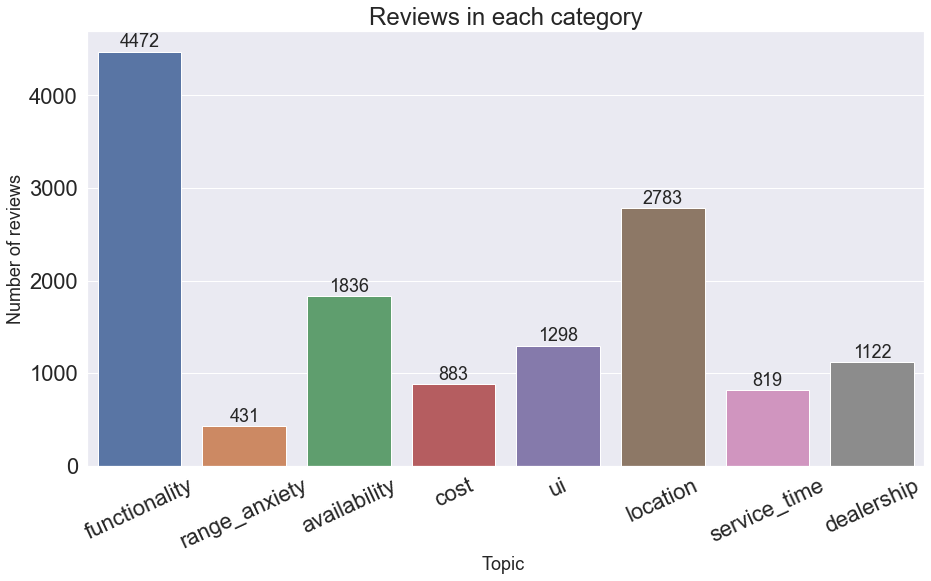

In [16]:
barplot(df, df.columns[1:])